In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import iqr

In [2]:
conv = pd.read_csv('conversion.csv')

ad_id – идентификатор объявления (рекламы)

xyz_campaign_id – идентификатор рекламной кампании в базе компании X

fb_campaign_id – идентификатор кампании в Facebook

age – возрастная группа, которой показывалась реклама

gender – пол тех, кому показывалась реклама

interest –код, указывающий категорию, к которой относится интерес пользователя (соответствие число – интерес, условно: 1 – животные, 2 – автомобили, 3 – тортики и т.д.)

impressions – число показов

clicks – число кликов

spent – сумма, которую компания потратила на показ объявления 

total_conversion – количество людей, которые заинтересовались продуктом 
после просмотра рекламы

approved_conversion – количество людей, которые купили продукт после просмотра рекламы

In [3]:
conv.sample(5, random_state=0)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
946,1122039,1178,144697,40-44,F,10,258954,61,82.279999,1,0
142,738463,936,109826,40-44,F,21,542,0,0.000000,1,0
934,1121977,1178,144686,35-39,F,29,139596,26,42.410000,1,1
625,1121296,1178,144573,35-39,M,15,180351,21,37.130000,1,1
124,737644,936,109629,45-49,M,16,45401,10,14.060000,1,0


In [4]:
conv.isna().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
age                    0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
dtype: int64

In [5]:
conv.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
age                       4
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion      16
dtype: int64

In [6]:
conv.Total_Conversion.unique()

array([ 2,  1,  4,  3,  0,  5, 28, 13, 11, 24, 60,  7, 40, 26,  6, 20,  9,
       23, 22, 31, 10,  8, 17, 15, 16, 19, 38, 12, 14, 21, 18, 30])

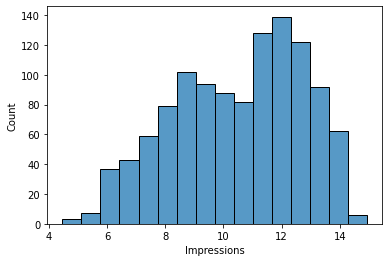

In [7]:
sns.histplot(np.log(conv.Impressions))

In [8]:
conv['ctr'] = conv.Clicks / conv.Impressions

In [9]:
conv.ctr.describe()

count    1143.000000
mean        0.000164
std         0.000115
min         0.000000
25%         0.000100
50%         0.000160
75%         0.000234
max         0.001059
Name: ctr, dtype: float64

In [10]:
conv[conv.ctr == max(conv.ctr)]

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr
150,738637,936,109857,45-49,F,24,944,1,1.42,1,0,0.001059


In [11]:
conv.xyz_campaign_id.unique()

array([ 916,  936, 1178])

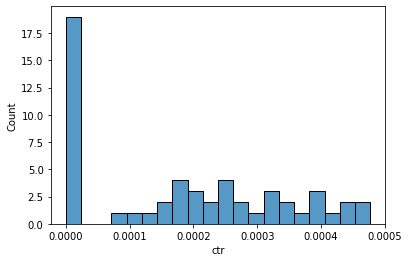

In [12]:
sns.histplot(conv.query('xyz_campaign_id == 916').ctr, bins=20)

In [13]:
conv['cpc'] = conv.Spent / conv.Clicks

In [14]:
conv.cpc.describe()

count    936.000000
mean       1.499347
std        0.232879
min        0.180000
25%        1.390000
50%        1.498273
75%        1.644364
max        2.212000
Name: cpc, dtype: float64

In [15]:
iqr(conv.cpc, nan_policy='omit')

0.25436369905

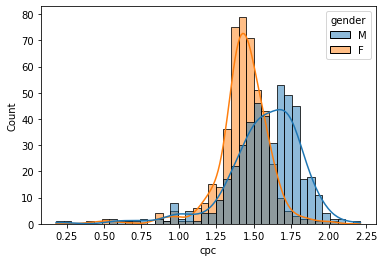

In [20]:
sns.histplot(conv.reset_index(drop=True).dropna(), x='cpc', hue=conv.gender, kde=True)

In [21]:
conv['cr'] = conv.Approved_Conversion / conv.Clicks

In [22]:
conv.query('ad_id == 1121814')

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,ctr,cpc,cr
860,1121814,1178,144659,30-34,F,27,2223278,421,612.300003,38,13,0.000189,1.454394,0.030879
